<a href="https://colab.research.google.com/github/prashanthdnss/Nithya_INFO5731_Fall2020/blob/master/In_class_exercise/In_Class_exercises_10_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [1]:
#Write your code here.
import pandas as pd
df = pd.read_csv("/content/clean_tweets.csv")

In [2]:
df

,Unnamed: 0,tweet_text
0,0,bdropping shami wc semissaini yesterday match ...
1,1,bipl here skipper virat kohli said royal chall...
2,2,bbharath1 i chat rcbvsdc match rather tepid af...
3,3,bkajariaceramic royal challenger bangalore sun...
4,4,biplonmc xf0x9fx8fx8f rcbvsdc royal challenger...
...,...,...
995,995,brcb qualified playoff consecutive lossesxf0x9...
996,996,brcb shouldnt cushion knowing need make dc pla...
997,997,bplaying multiple lucrative ipl game time obvi...
998,998,bipl make team play last game time like soccer...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['tweet_text'].values)
tfidf.shape

(1000, 4816)

In [4]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [5]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [6]:
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0028244 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00132666, 0.        , ..., 0.        , 0.00167511,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00148045],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
terms1 = tfidf_vect.get_feature_names()

In [8]:
terms1[1:10]

['100',
 '100daysofcode',
 '100mya__',
 '10chahal',
 '10th',
 '10w6l',
 '11siraj',
 '15th',
 '19th']

In [9]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [10]:
silhouette_score_tf

0.008822519123464101

In [11]:
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Unnamed: 0,tweet_text,Tfidf Clus Label
0,0,bdropping shami wc semissaini yesterday match ...,7
1,1,bipl here skipper virat kohli said royal chall...,9
2,2,bbharath1 i chat rcbvsdc match rather tepid af...,0
3,3,bkajariaceramic royal challenger bangalore sun...,9
4,4,biplonmc xf0x9fx8fx8f rcbvsdc royal challenger...,9


In [13]:
df1.groupby(['Tfidf Clus Label'])['tweet_text'].count()

Tfidf Clus Label
0     47
1    139
2     91
3     58
4    187
5     45
6     28
7    237
8    139
9     29
Name: tweet_text, dtype: int64

In [14]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: brcb
 rcbvsdc
 ipl2020
 match
 loss
 playoff
 qualify
 rcb
 fan
 qualified
Cluster 1: srh
 mi
 win
 kkr
 mivssrh
 ipl2020
 sunrisers
 match
 srhvsmi
 srhvmi
Cluster 2: point
 table
 team
 amp
 ipl2020
 delhicapitals
 dcvrcb
 finish
 stage
 finished
Cluster 3: dc
 rcb
 mi
 final
 qualifier
 win
 ipl2020
 kkr
 iplseason13
 bdcvrcb
Cluster 4: rcb
 rcbtweets
 playoff
 playbold
 ipl2020
 rcbvsdc
 qualified
 imvkohli
 delhicapitals
 dcvrcb
Cluster 5: csk
 mi
 kxip
 thankyouwatson
 cricket
 watson
 shanewatson
 rr
 ipl2020
 watto
Cluster 6: election2020
 biggboss2020
 real
 waadahai
 biden
 trump
 firstot12exoffbykazifabia
 parkjimin
 ipl2020
 cbiwhokilledssr
Cluster 7: ipl2020
 dcvrcb
 delhicapitals
 match
 game
 kohli
 team
 iplseason13
 win
 one
Cluster 8: ipl
 ipl2020
 team
 season
 run
 time
 iplinuae
 like
 dream11ipl
 year
Cluster 9: bangalore
 royal
 delhi
 challenger
 capital
 playwithkajaria
 kajaria
 kajariaceramics
 bkajariaceramic
 kolkata


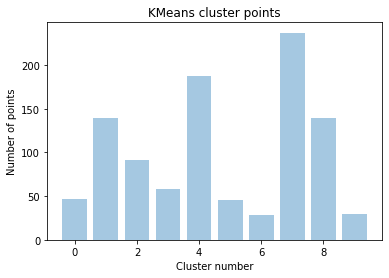

In [18]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['tweet_text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

Clustering DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
minimum_Points = 2 * 100

def lower_b(nums, targ): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mid = int(l + (r - l) / 2)
        if nums[mid] >= targ:
            r = mid - 1
        else:
            l = mid + 1
    return l

In [40]:
def com_200th_near_tneigh(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_b(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [56]:
import numpy as np
sent_vectors = []; 
for sent in df['tweet_text']: 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [55]:
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

(1000, 100)

In [42]:

twohundreth_formula = []
for val in sent_vectors[:1500]:
    twohundreth_formula.append( com_200th_near_tneigh(val, sent_vectors[:1500]) )
twohundreth_formula.sort()

Text(0, 0.5, 'Distance of 200th Nearest Neighbour')

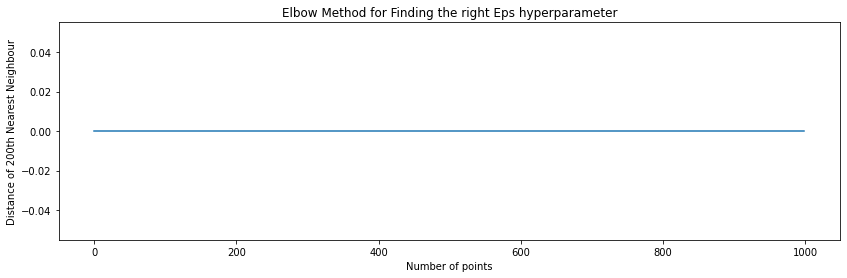

In [48]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundreth_formula))], twohundreth_formula)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")

In [53]:
model = DBSCAN(eps = 1, min_samples = minimum_Points, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [54]:

df['AVG-W2V Clus Label'] = model.labels_
df

,Unnamed: 0,tweet_text,Tfidf Clus Label,AVG-W2V Clus Label
0,0,bdropping shami wc semissaini yesterday match ...,7,0
1,1,bipl here skipper virat kohli said royal chall...,9,0
2,2,bbharath1 i chat rcbvsdc match rather tepid af...,0,0
3,3,bkajariaceramic royal challenger bangalore sun...,9,0
4,4,biplonmc xf0x9fx8fx8f rcbvsdc royal challenger...,9,0
...,...,...,...,...
995,995,brcb qualified playoff consecutive lossesxf0x9...,0,0
996,996,brcb shouldnt cushion knowing need make dc pla...,7,0
997,997,bplaying multiple lucrative ipl game time obvi...,8,0
998,998,bipl make team play last game time like soccer...,2,0


Clustering Hierarchical

In [59]:
import scipy
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
Agg=cluster.fit_predict(sent_vectors.any())

AttributeError: ignored

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.

NOTE: For this exercise, my Final Project cleaned tweets text dataset was used instead of amazon reviews since the dataset was large and 
was taking time while running models.

After running models: Inference:

In K-means clustering, optimal number of clusters are found out using elbow method, where as in DBSCAN method number of clusters need 
not be specified. As we got DBSCAN elbow method curve as straight, it can be clearly observed that it must not be used for datasets
like high dimensional. Usually, DBSCAN is used when the dataset has many outliers. While K-means required 'K', DBSCAN required variables
like 'Radius' and 'Minimum Points' which was took as 200.
